# CONECTANDO E IMPORTANDO DADOS...



---



In [ ]:
#@title Conecting to GDrive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Libraries

import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
#@title Importing SpreadSheet

#file_path = '[arquivo Excel com os dados originais]'

try:
  # Read the Excel file into a pandas DataFrame
  df = pd.read_excel(file_path)

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


# DATAFRAME (df) e PRÉ-PROCESSAMENTO



---



In [ ]:
# o nome das colunas em df

df.columns

Index(['sis BIB', 'autor', 'título', 'imprenta', 'sis ADM', 'codbarras',
       'material', 'status item', 'data registro', 'data atualiz',
       'última devoluçao', 'nº empréstimos', 'coleção', 'tipo chamada',
       'localização', 'segunda localização', 'descrição', 'nota opac',
       'nota circulação', 'nota interna', 'nº pedido', 'nº tombo',
       'data tombo', 'preço', 'estatítica', 'data chegada (fasc.)',
       'status processamento', 'data status proces.', 'exemplar',
       'ano (fasc.)', 'volume (fasc.)', 'número (fasc.)'],
      dtype='object')

In [ ]:
# o número de colunas em df

num_cols = len(df.columns)
print(f"The DataFrame has {num_cols} columns.")


The DataFrame has 33 columns.


In [ ]:
#@title Pré-Processamento: retirar os espaços em branco e caracteres inválidos em todas as colunas

# Function to clean a single string
def clean_string(text):
  if isinstance(text, str):
    # Remove extra whitespace and invalid characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove invalid characters (excluding word characters and whitespace)
    text = ' '.join(text.split())       # Remove extra spaces
    return text
  return text # Return as is if not a string


# Apply the cleaning function to all string columns
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].apply(clean_string)
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        pass #Skip datetime columns
    else:
        # Handle other data types (e.g., numeric) as needed
        #  or convert them to strings before cleaning.
        try:
            df[col] = df[col].astype(str).apply(clean_string)
        except:
          pass # Some columns may not be able to be converted to string

In [ ]:
#@title renomear a coluna df.data tombo para df.data_tombo

# Rename the column 'data tombo' to 'data_tombo'
df = df.rename(columns={'data tombo': 'data_tombo'})


In [ ]:
df.data_tombo

,data_tombo
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
...,...
424949,NaT
424950,NaT
424951,NaT
424952,NaT


In [ ]:
#@title Pré-Processamento: conversão data tombo para datetime

df['data_tombo'] = df['data_tombo'].astype(str)

df['data_tombo'] = pd.to_datetime(df['data_tombo'], format='%Y%m%d', errors='coerce')

In [ ]:
#@title listar as colunas .autor, .título, .imprenta, .data_tombo

# Display specific columns
df[['autor', 'título', 'imprenta', 'data_tombo']]


,autor,título,imprenta,data_tombo
0,"Maya, Raymundo Ottoni de Castro,",A Floresta da Tijuca /,"Rio de Janeiro Bloch 1967, [isto é 1966]",NaT
1,"Amado, Jorge,",Tenda dos milagres :,São Paulo Martins 1969,NaT
2,"Mallin, Jay,",A verdade sobre São Domingos /,Rio de Janeiro Bloch 1965,NaT
3,"Lima, Jorge de,",Antologia poética /,Rio de Janeiro Sabia 1969,NaT
4,"Beauvoir, Simone de,",Os mandarins /,São Paulo Difusão Européia do Livro 1966,NaT
...,...,...,...,...
424949,NaN,Ética e pós-verdade /,Porto Alegre Dublinense 2022,NaT
424950,NaN,Educação e direitos humanos :,"Brasília Cátedra Unesco de Juventude, Educação...",NaT
424951,"Carvalho, Francisco Bertino Bezerra de,",Legitimação da criação do Direito pelos tribun...,Rio de Janeiro Autografia 2021,NaT
424952,"Carvalho Filho, José dos Santos,",Manual de direito administrativo :,São Paulo Atlas 2024,NaT


In [ ]:
#@title Pré-Processamento: acrescentar coluna Class_CDU

import re

def extract_first_digit(text):
  if pd.isna(text) or not isinstance(text, str):
    return None
  match = re.search(r'\d', text)
  if match:
    return match.group(0)
  else:
    return None

df['Class_CDU'] = df['localização'].apply(extract_first_digit)

df[['autor', 'título', 'localização', 'Class_CDU']]


,autor,título,localização,Class_CDU
0,Maya Raymundo Ottoni de Castro,A Floresta da Tijuca,918153 MAYARO FLORE,9
1,Amado Jorge,Tenda dos milagres,869081 AMADOJ TENDA,8
2,Mallin Jay,A verdade sobre São Domingos,97293 MALINJ VERDA,9
3,Lima Jorge de,Antologia poética,869081 LIMAJ ANTOL,8
4,Beauvoir Simone de,Os mandarins,840 BEAUVS MANDA,8
...,...,...,...,...
424949,nan,Ética e pósverdade,17 ETICAPV ETICA 6IMPR,1
424950,nan,Educação e direitos humanos,342737 EDUCADH EDUCA,3
424951,Carvalho Francisco Bertino Bezerra de,Legitimação da criação do Direito pelos tribunais,34798 CARVAFB LEGIT,3
424952,Carvalho Filho José dos Santos,Manual de direito administrativo,342981 CARVAJS MANUA 38ED 2REIMPR,3


# CONTAGENS BÁSICAS (debug)



---



In [ ]:
#@title contar o número total de linhas no dataframe df

# Get the number of rows in the DataFrame.
num_rows = len(df)

# Print the result.
print(f"The total number of lines in the DataFrame df is: {num_rows}")


The total number of lines in the DataFrame df is: 424954


In [ ]:
#@title valores únicos da coluna df.título

# Count unique values in 'título' column of df_short_livro DataFrame
unique_titles = df['título'].nunique()

# Print the number of unique titles
print(f"The number of unique titles in df is: {unique_titles}")

The number of unique titles in df is: 147355


# CONTANDO COLEÇÕES



---



In [ ]:
#@title Coleções no DataFrame df

# Display and count unique values in the 'coleção' column, excluding NaN values
unique_collections = df['coleção'].dropna().unique()
print(unique_collections)
print("\nNumber of unique values:", len(unique_collections))


['nan' 'R' 'V' 'E' 'SEPAR' 'CDE' 'P' 'MULTI' 'MAPA' 'X']

Number of unique values: 10


In [ ]:
print(len(unique_collections))
print(unique_collections[3])

10
E


In [ ]:
#@title DataFrames Slice para cada coleção (total itens)

# Loop through unique collections
for collection in unique_collections:
    # Slice the DataFrame for the current collection
    df_slice = df[df['coleção'] == collection]

    # Create a new DataFrame with the name df_slice_{collection}
    globals()[f'df_slice_{collection}'] = df_slice


In [ ]:
#@title Tabela 1: total linhas e total linhas título único

# Create a list to store the table data
table_data = []

# Iterate through unique collections
for collection in unique_collections:
    # Get the DataFrame slice for the current collection
    df_slice = globals().get(f'df_slice_{collection}', None)

    if df_slice is not None:
        # Calculate the total number of rows
        total_rows = len(df_slice)
        # Calculate the number of unique titles
        unique_titles = df_slice['título'].nunique()
        table_data.append([f'df_slice_{collection}', collection, total_rows, unique_titles])
    else:
        print(f"Warning: DataFrame df_slice_{collection} not found.")

# Create a pandas DataFrame from the table data
table_df = pd.DataFrame(table_data, columns=['DataFrame', 'Coleção', 'Total de Linhas', 'Títulos Únicos'])

# Display the table
table_df


,DataFrame,Coleção,Total de Linhas,Títulos Únicos
0,df_slice_nan,nan,183382,131017
1,df_slice_R,R,6756,3012
2,df_slice_V,V,10988,4402
3,df_slice_E,E,7006,1165
4,df_slice_SEPAR,SEPAR,13037,6012
5,df_slice_CDE,CDE,2271,487
6,df_slice_P,P,199787,2452
7,df_slice_MULTI,MULTI,1547,1133
8,df_slice_MAPA,MAPA,161,108
9,df_slice_X,X,19,19


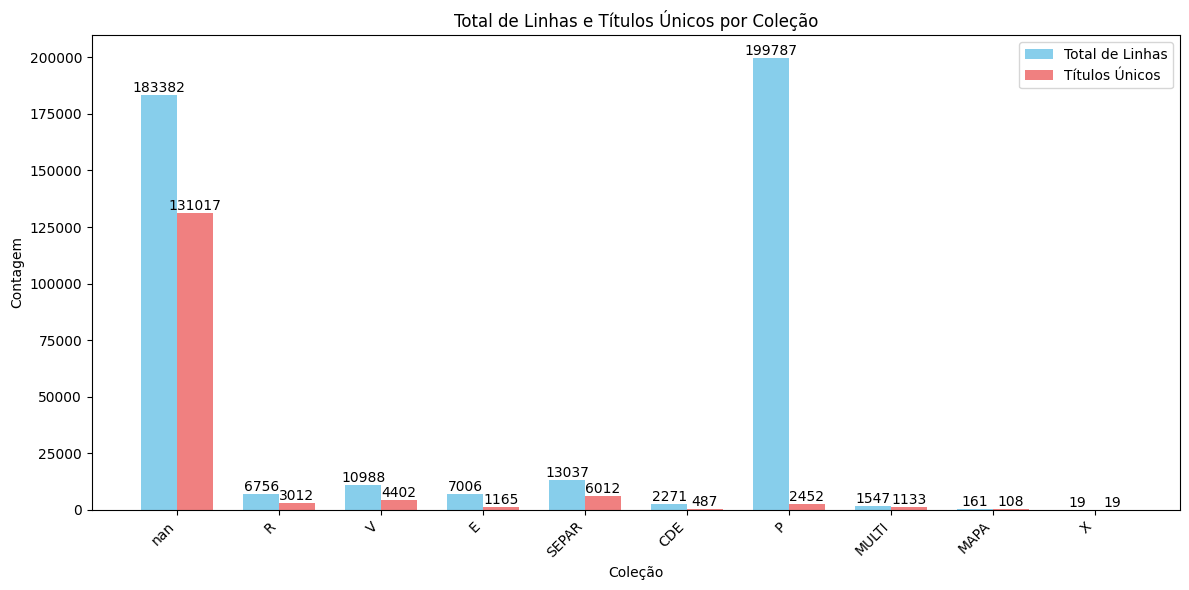

In [ ]:
#@title Gráfico 1: Comparando total itens (coleção) e títulos únicos

# Create the double bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(table_df))

bars1 = plt.bar(index, table_df['Total de Linhas'], bar_width, label='Total de Linhas', color='skyblue')
bars2 = plt.bar([i + bar_width for i in index], table_df['Títulos Únicos'], bar_width, label='Títulos Únicos', color='lightcoral')

plt.xlabel('Coleção')
plt.ylabel('Contagem')
plt.title('Total de Linhas e Títulos Únicos por Coleção')
plt.xticks([i + bar_width / 2 for i in index], table_df['Coleção'], rotation=45, ha='right')
plt.legend()

# Add labels above each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
#@title Tabela 2: Títulos totais agrupados por Classe CDU

# Create a list to store the table data
table_data_2 = []

# Iterate through unique collections
for collection in unique_collections:
    # Get the DataFrame slice for the current collection
    df_slice = globals().get(f'df_slice_{collection}', None)
    if df_slice is not None:
        # Group by 'Class_CDU' and count unique rows
        class_counts = df_slice.groupby('Class_CDU').size().reset_index(name='counts')

        # Append data to the table
        for index, row in class_counts.iterrows():
            table_data_2.append([collection, row['Class_CDU'], row['counts']])
    else:
        print(f"Warning: DataFrame df_slice_{collection} not found.")

# Create a pandas DataFrame from the table data
table_df_2 = pd.DataFrame(table_data_2, columns=['Coleção', 'Class_CDU', 'Total de Linhas por Classe'])

# Display the table
table_df_2


,Coleção,Class_CDU,Total de Linhas por Classe
0,nan,0,5624
1,nan,1,4536
2,nan,2,2257
3,nan,3,116685
4,nan,4,1
...,...,...,...
69,MULTI,9,48
70,MAPA,3,12
71,MAPA,5,19
72,MAPA,6,17


In [ ]:
#@title Classe 4 na Valiosa

# Filter the DataFrame for Class_CDU equal to 4
df_slice_V_filtered = df_slice_V[df_slice_V['Class_CDU'] == '4']

# Select the desired columns
df_slice_V_filtered = df_slice_V_filtered[['autor', 'título', 'localização', 'Class_CDU']]

# Display the filtered DataFrame
df_slice_V_filtered


,autor,título,localização,Class_CDU
267713,nan,Annaes da Camara dos Deputados do Estado de Al...,PV44,4
267714,nan,Annaes da Camara dos Deputados do Estado de Al...,PV44,4
267715,nan,Annaes da Camara dos Deputados do Estado de Al...,PV44,4
267716,nan,Annaes da Camara dos Deputados do Estado de Al...,PV44,4
267717,nan,Annaes da Camara dos Deputados do Estado de Al...,PV44,4
...,...,...,...,...
313980,nan,Collecção das leis do Estado do Maranhão,PV48,4
313981,nan,Collecção das leis do Estado do Maranhão,PV48,4
313982,nan,Collecção das leis do Estado do Maranhão,PV48,4
313983,nan,Collecção das leis do Estado do Maranhão,PV48,4


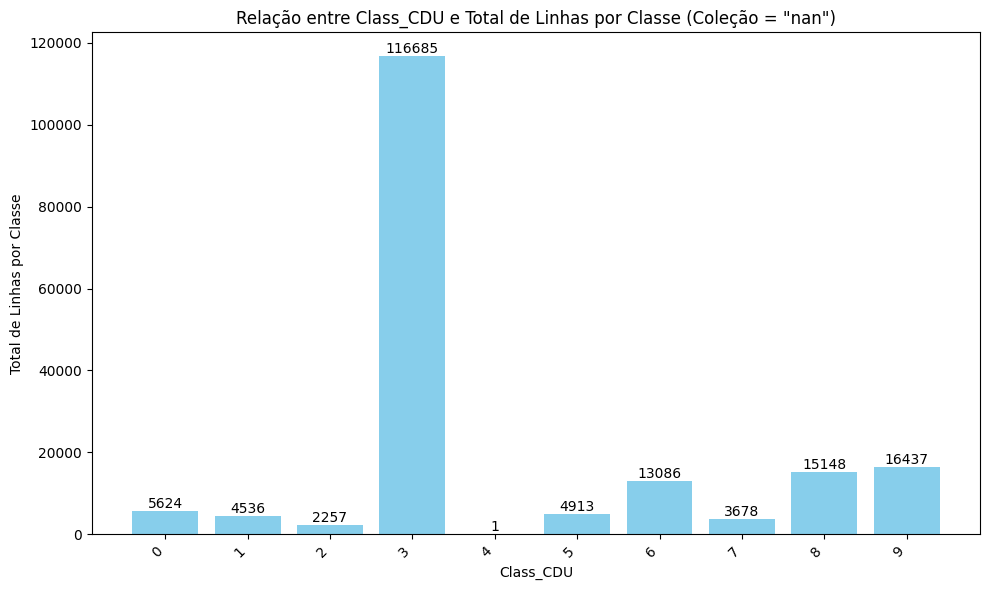

In [ ]:
#@title Gráfico 2: Distribuição classe CDU por coleção

# ALTERAR AQUI O NOME DA COLEÇÃO PARA GRÁFICOS ESPECÍFICOS
nan_collection_df = table_df_2[table_df_2['Coleção'] == "nan"]

# Group by 'Class_CDU' and sum 'Total de Linhas por Classe'
class_counts = nan_collection_df.groupby('Class_CDU')['Total de Linhas por Classe'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class_CDU')
plt.ylabel('Total de Linhas por Classe')
plt.title('Relação entre Class_CDU e Total de Linhas por Classe (Coleção = "nan")')

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
#@title Tabela 3: Títulos únicos agrupados por classe CDU

# Create a list to store the table data
table_data_3 = []

# Iterate through unique collections
for collection in unique_collections:
    # Get the DataFrame slice for the current collection
    df_slice = globals().get(f'df_slice_{collection}', None)
    if df_slice is not None:
        # Group by 'Class_CDU' and count unique titles
        class_title_counts = df_slice.groupby('Class_CDU')['título'].nunique().reset_index(name='unique_titles_count')

        # Append data to the table
        for index, row in class_title_counts.iterrows():
            table_data_3.append([collection, row['Class_CDU'], row['unique_titles_count']])
    else:
        print(f"Warning: DataFrame df_slice_{collection} not found.")

# Create a pandas DataFrame from the table data
table_df_3 = pd.DataFrame(table_data_3, columns=['Coleção', 'Class_CDU', 'Total de Títulos Únicos'])

# Display the table
table_df_3


,Coleção,Class_CDU,Total de Títulos Únicos
0,nan,0,4533
1,nan,1,3738
2,nan,2,1914
3,nan,3,79881
4,nan,4,1
...,...,...,...
69,MULTI,9,41
70,MAPA,3,10
71,MAPA,5,13
72,MAPA,6,4


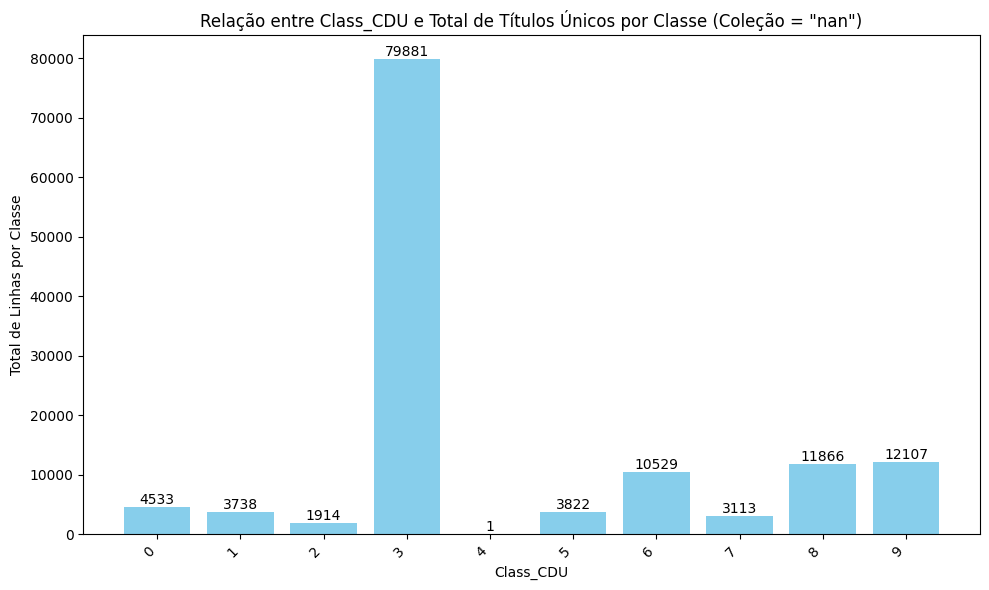

In [ ]:
#@title Gráfico 3: Distribuição classe CDU por coleção (títulos únicos)

# ALTERAR AQUI O NOME DA COLEÇÃO PARA GRÁFICOS ESPECÍFICOS
nan_collection_df = table_df_3[table_df_3['Coleção'] == "nan"]

# Group by 'Class_CDU' and sum 'Total de Linhas por Classe'
class_counts = nan_collection_df.groupby('Class_CDU')['Total de Títulos Únicos'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class_CDU')
plt.ylabel('Total de Linhas por Classe')
plt.title('Relação entre Class_CDU e Total de Títulos Únicos por Classe (Coleção = "nan")')

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
#@title DataFrames Pandas criados (para Debug do código)

# List all variables in the current namespace
all_vars = globals()

# Filter for DataFrame objects
dataframes = [var for var, obj in all_vars.items() if isinstance(obj, pd.DataFrame)]

# Print the names of the DataFrames
print("DataFrames found in this notebook:")
for df_name in dataframes:
  print(df_name)


DataFrames found in this notebook:
_
__
___
df
_9
df_slice
df_slice_nan
df_slice_R
df_slice_V
df_slice_E
df_slice_SEPAR
df_slice_CDE
df_slice_P
df_slice_MULTI
df_slice_MAPA
df_slice_X
table_df
_16
table_df_2
_18
nan_collection_df
class_title_counts
table_df_3
_20


# EVOLUÇÃO DO ACERVO



---



In [ ]:
#@title Tabela 4: Contagem novos títulos por ano no acervo

# Filter the DataFrame
df_class_nan = df[(df['Class_CDU'] == '3') & (df['data tombo'].dt.year > 1950) & (df['data tombo'].dt.year < 2025)]

# Group by year and count unique titles
title_counts_by_year = df_class_nan.groupby(df_class_nan['data tombo'].dt.year)['título'].nunique()

# Create a DataFrame from the result
table_df_4 = pd.DataFrame({'Ano': title_counts_by_year.index, 'Contagem de Títulos': title_counts_by_year.values})

# Display the table
table_df_4

,Ano,Contagem de Títulos
0,1951,4
1,1952,51
2,1953,302
3,1954,390
4,1955,247
...,...,...
69,2020,326
70,2021,2502
71,2022,1058
72,2023,809


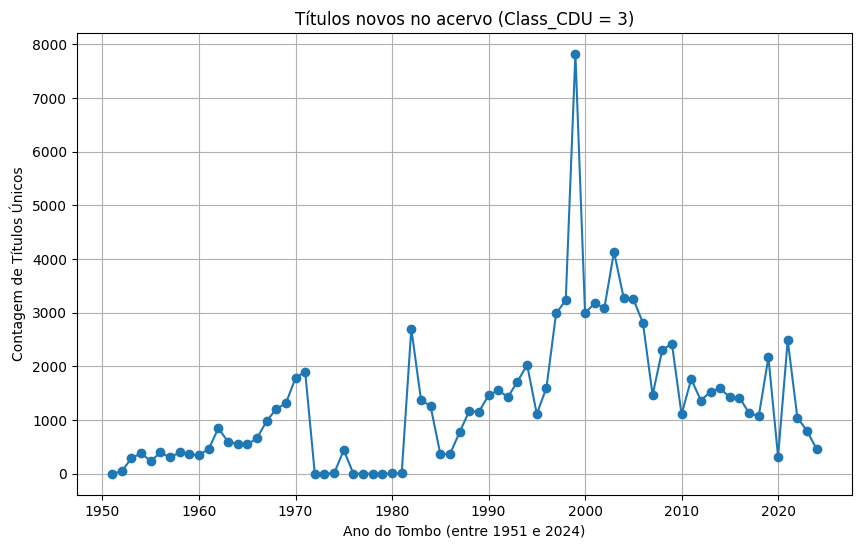

In [ ]:
#@title Gráfico 4: títulos únicos novos no Acervo (após 1950 e antes 2025)

# Filter the DataFrame
df_filtered = df_slice_nan[
    (df_slice_nan.Class_CDU == '3') &
    (df_slice_nan['data tombo'].dt.year > 1950) &
    (df_slice_nan['data tombo'].dt.year < 2025)
]

# Group by 'data tombo' year and count unique titles
title_counts = df_filtered.groupby(df_filtered['data tombo'].dt.year)['título'].nunique()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(title_counts.index, title_counts.values, marker='o')
plt.xlabel('Ano do Tombo (entre 1951 e 2024)')
plt.ylabel('Contagem de Títulos Únicos')
plt.title('Títulos novos no acervo (Class_CDU = 3)')
plt.grid(True)
plt.show()

# EXPORTAÇÃO DADASETs TRATADOS



---



In [ ]:
#@title Informações sobre df_slice_nan

df_slice_nan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 183382 entries, 0 to 424953
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   sis BIB               183382 non-null  object        
 1   autor                 183382 non-null  object        
 2   título                183382 non-null  object        
 3   imprenta              183382 non-null  object        
 4   sis ADM               183382 non-null  object        
 5   codbarras             183382 non-null  object        
 6   material              183382 non-null  object        
 7   status item           183382 non-null  object        
 8   data registro         183382 non-null  object        
 9   data atualiz          183382 non-null  object        
 10  última devoluçao      183382 non-null  object        
 11  nº empréstimos        183382 non-null  object        
 12  coleção               183382 non-null  object        
 13  tipo

In [ ]:
#@title dataframes slices

# Assuming df_slice_nan exists from previous code execution

df_slice_nan_short = df_slice_nan[df_slice_nan['material'] == 'LIVRO'].drop_duplicates(subset=['título'])

df_slice_nan_short = df_slice_nan_short[['autor', 'título', 'imprenta', 'localização', 'descrição', 'data tombo', 'Class_CDU']]
df_slice_nan_short

,autor,título,imprenta,localização,descrição,data tombo,Class_CDU
0,Maya Raymundo Ottoni de Castro,A Floresta da Tijuca,Rio de Janeiro Bloch 1967 isto é 1966,918153 MAYARO FLORE,nan,NaT,9
1,Amado Jorge,Tenda dos milagres,São Paulo Martins 1969,869081 AMADOJ TENDA,nan,NaT,8
2,Mallin Jay,A verdade sobre São Domingos,Rio de Janeiro Bloch 1965,97293 MALINJ VERDA,nan,NaT,9
3,Lima Jorge de,Antologia poética,Rio de Janeiro Sabia 1969,869081 LIMAJ ANTOL,nan,NaT,8
4,Beauvoir Simone de,Os mandarins,São Paulo Difusão Européia do Livro 1966,840 BEAUVS MANDA,V2,NaT,8
...,...,...,...,...,...,...,...
424948,Jesus Carolina Maria de,Quarto do despejo,São Paulo Ática 2023,869081 JESUSCM QUART 9REIMPR,nan,NaT,8
424949,nan,Ética e pósverdade,Porto Alegre Dublinense 2022,17 ETICAPV ETICA 6IMPR,nan,NaT,1
424950,nan,Educação e direitos humanos,Brasília Cátedra Unesco de Juventude Educação ...,342737 EDUCADH EDUCA,nan,NaT,3
424951,Carvalho Francisco Bertino Bezerra de,Legitimação da criação do Direito pelos tribunais,Rio de Janeiro Autografia 2021,34798 CARVAFB LEGIT,nan,NaT,3


In [ ]:
#@title Exportar colunas de df_slice_nan (acervo geral)

# Export the DataFrame to a CSV file with specified columns and encoding
columns_to_export = ['autor', 'título', 'imprenta', 'material', 'coleção', 'localização', 'descrição', 'data tombo', 'Class_CDU']

df_slice_nan[columns_to_export].to_csv('[ACRESCENTAR LOCAL PARA SALVAR O DATASET]/dset_geral_doFolio.csv', sep=';', encoding='utf-8', index=False)


# FINALIZAÇÃO

o ARQUIVO dset_geral_doFolio foi disponibilizado no Kaggle:

https://www.kaggle.com/datasets/ernestocarlosbode/books-metadata

